In [33]:
!pip install --upgrade bottleneck


In [34]:
import pandas as pd
import pandas as pd
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
file_path = R"C:\Users\DIKY\tweets-data\DATA FINAL.csv"
df = pd.read_csv(file_path)
df.head(30)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1794335661492994055,Sat May 25 11:52:13 +0000 2024,9,Pemerintah hapus kelas #BPJS yg dulunya ada ke...,1794335661492994055,https://pbs.twimg.com/ext_tw_video_thumb/17943...,NaN,in,Indonesia,0,3,4,https://x.com/3rwin__34/status/179433566149299...,1385407713987874820,3rwin__34
1,1790254114078949660,Tue May 14 05:33:36 +0000 2024,1,Rancangan awal sbg Asuransi yg meringankan dal...,1790254114078949660,https://pbs.twimg.com/amplify_video_thumb/1789...,NaN,in,NaN,0,0,0,https://x.com/mindaart/status/1790254114078949660,178600446,mindaart
2,1797833808571695161,Tue Jun 04 03:32:36 +0000 2024,0,Bikin SIM baru atau perpanjang masa berlaku SI...,1797833808571695161,https://pbs.twimg.com/media/GPMwUgiaMAArozK.jpg,NaN,in,Jakarta,0,1,0,https://x.com/holopiscom/status/17978338085716...,1366400664960573441,holopiscom
3,1795072462704517151,Mon May 27 12:40:00 +0000 2024,7,Sudah tidak ada konsep Gotong royong yang berk...,1795072462704517151,https://pbs.twimg.com/ext_tw_video_thumb/17950...,NaN,in,Indonesia,0,1,1,https://x.com/3rwin__34/status/179507246270451...,1385407713987874820,3rwin__34
4,1795472094450299216,Tue May 28 15:08:00 +0000 2024,2,Cara Tahu Password Social Media #GOTO #BPJS #J...,1795472094450299216,https://pbs.twimg.com/ext_tw_video_thumb/17953...,NaN,in,NaN,0,0,0,https://x.com/mindaart/status/1795472094450299216,178600446,mindaart
5,1790391290817065041,Tue May 14 14:38:42 +0000 2024,15,Ngalahin Nabila ini ibu!? Apa gak mengganggu k...,1790391290817065041,https://pbs.twimg.com/ext_tw_video_thumb/17900...,NaN,in,NaN,0,6,7,https://x.com/mindaart/status/1790391290817065041,178600446,mindaart
6,1792872978448888141,Tue May 21 11:00:02 +0000 2024,67,Melalui kerja sama dan sinergi yang kuat dihar...,1792872978448888141,https://pbs.twimg.com/ext_tw_video_thumb/17924...,NaN,in,Indonesia,4,1,24,https://x.com/muhammadiyah/status/179287297844...,73309923,muhammadiyah
7,1790290958250308057,Tue May 14 08:00:01 +0000 2024,0,BPJS Kesehatan akan mulai memberlakukan sistem...,1790290958250308057,https://pbs.twimg.com/media/GNhB2GVbAAAjiZt.jpg,NaN,in,iNews Tower Jakarta,0,0,0,https://x.com/SeputariNews/status/179029095825...,375995332,SeputariNews
8,1797820496635179454,Tue Jun 04 02:39:42 +0000 2024,3,Enhance productivity with our Payroll &amp; HR...,1797820496635179454,https://pbs.twimg.com/media/GPMkL5ybsAAmp41.jpg,NaN,en,INDONESIA,0,0,0,https://x.com/PTGASI/status/1797820496635179454,2706071779,PTGASI
9,1790306068368630203,Tue May 14 09:00:03 +0000 2024,9,Presiden Joko Widodo mengubah sistem kelas dal...,1790306068368630203,https://pbs.twimg.com/ext_tw_video_thumb/17902...,NaN,in,Jakarta - Indonesia,0,0,6,https://x.com/detikHealth/status/1790306068368...,104446991,detikHealth


In [36]:
selected_column = ['full_text']
df = df[selected_column]
df

,full_text
0,Pemerintah hapus kelas #BPJS yg dulunya ada ke...
1,Rancangan awal sbg Asuransi yg meringankan dal...
2,Bikin SIM baru atau perpanjang masa berlaku SI...
3,Sudah tidak ada konsep Gotong royong yang berk...
4,Cara Tahu Password Social Media #GOTO #BPJS #J...
...,...
1352,Layangan vaksin internasional menjadi kebutuha...
1353,Pemeriksaan awal penting untuk kenal pasti ris...
1354,Tahun Depan Vaksin Covid-19 Bayar Ratusan Ribu...
1355,KELIRU Konten tentang Pemasangan Microchip Mel...


In [37]:
df.rename(columns= {'full_text': 'text'}, inplace=True)

In [38]:
# proses case folding 
def casefolding(Review):
    Review = Review.lower()
    return Review
df['text'] = df['text'].apply(casefolding)
df.head(10)

,text
0,pemerintah hapus kelas #bpjs yg dulunya ada ke...
1,rancangan awal sbg asuransi yg meringankan dal...
2,bikin sim baru atau perpanjang masa berlaku si...
3,sudah tidak ada konsep gotong royong yang berk...
4,cara tahu password social media #goto #bpjs #j...
5,ngalahin nabila ini ibu!? apa gak mengganggu k...
6,melalui kerja sama dan sinergi yang kuat dihar...
7,bpjs kesehatan akan mulai memberlakukan sistem...
8,enhance productivity with our payroll &amp; hr...
9,presiden joko widodo mengubah sistem kelas dal...


In [39]:

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    # Menghapus spasi ekstra
    text = re.sub(r'\s+', ' ', text)
    # Menghapus mention
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # removing mentions
    # Menghapus hashtag
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # removing hastag
    text = re.sub(r'RT[\s]+', '', text)  # removing RT
    text = re.sub(r"http\S+", '', text)  # removing link
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = re.sub(r'\b\w{1,3}\b','',text)

    text = re.sub(r'[^A-Za-z]+', ' ', text)  # removing all character non alphabet

    text = text.replace('\n', ' ')  # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation))  # removing all punctuations
    text = text.strip(' ')

    return text
df['text'] = df['text'].apply(preprocess_text)

In [40]:
# -------CLEAN NUMBER----------
def clean_numbers(x):

    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x
df['text'] = df['text'].apply(lambda x: clean_numbers(x))

In [41]:
!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y
To: C:\Users\DIKY\1. GEMASTIK\slang.txt

  0%|          | 0.00/32.8k [00:00<?, ?B/s]
100%|##########| 32.8k/32.8k [00:00<00:00, 29.3MB/s]


In [42]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [43]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [44]:
clean_text = []
for review in df['text']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [45]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df['text'] = df['text'].apply(word_tokenize_wrapper)
df.head()

,text
0,"[pemerintah, hapus, kelas, dulunya, kelas, dis..."
1,"[rancangan, awal, asuransi, meringankan, dalam..."
2,"[bikin, baru, atau, perpanjang, masa, berlaku,..."
3,"[sudah, tidak, konsep, gotong, royong, yang, b..."
4,"[cara, tahu, password, social, media]"


In [46]:
! pip install Sastrawi

In [47]:
!pip install gdown

In [48]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: C:\Users\DIKY\1. GEMASTIK\lexicon_positive_ver1.csv

  0%|          | 0.00/41.4k [00:00<?, ?B/s]
100%|##########| 41.4k/41.4k [00:00<00:00, 39.8MB/s]


In [49]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: C:\Users\DIKY\1. GEMASTIK\lexicon_negative_ver1.csv

  0%|          | 0.00/82.8k [00:00<?, ?B/s]
100%|##########| 82.8k/82.8k [00:00<00:00, 1.29MB/s]


In [50]:
import csv

lexicon_positive = dict()
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Menambahkan nilai untuk kata yang telah diberikan
lexicon_positive.update({
    'bagus': 4,
    'membantu': 2,
    'mantap': 4,
    'sangat mantap': 5,
    'mantapss': 4,
    'memuaskan': 4,
    'sangat': 0,
    'mantaapp': 4,
    'berbelanja': 3,
    'belanja': 2,
    'baik': 1
})


lexicon_negative.update({
    'bagus': 4,
    'membantu': 2,
    'mantap': 4,
    'sangat mantap': 5,
    'mantapss': 4,
    'memuaskan': 4,
    'sangat': 0,
    'mantaapp': 4,
    'berbelanja': 3,
    'belanja': 2,
    'mantab':2,
    'baik': 1,
    'sangat': 0,
    'cepat':3,
    'memudahkan':2,
    'murah':2,
    'oke':1,
    'mantaps':1,
    'keren':3,
    'best':2,
    'boongan':-7,
    'mulu':-3,
    'nipu':-8
})


def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word_pos in text:
        if word_pos in lexicon_positive:
            score += lexicon_positive[word_pos]
    for word_neg in text:
        if word_neg in lexicon_negative:
            score += lexicon_negative[word_neg]
    polarity = ''
    if score >= 0:
        polarity = 'positif'
    else:
        polarity = 'negatif'

    return score, polarity


# def sentiment_analysis_lexicon_indonesia(text):
#     score = 0
#     for word_pos in text:
#         if word_pos in lexicon_positive:
#             score += lexicon_positive[word_pos]
#     for word_neg in text:
#         if word_neg in lexicon_negative:
#             score += lexicon_negative[word_neg]
#     polarity = ''
#     if score > 0:
#         polarity = 'positif'
#     elif score < 0:
#         polarity = 'negatif'
#     else:
#         polarity = 'netral'

#     return score, polarity


In [51]:
results = df['text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negatif    696
positif    661
Name: count, dtype: int64


In [52]:
df[(df['polarity']=='positif')]

,text,polarity_score,polarity
3,"[sudah, tidak, konsep, gotong, royong, yang, b...",0,positif
4,"[cara, tahu, password, social, media]",0,positif
6,"[melalui, kerja, sama, sinergi, yang, kuat, di...",21,positif
8,"[enhance, productivity, with, payroll, service...",0,positif
9,"[presiden, joko, widodo, mengubah, sistem, kel...",0,positif
...,...,...,...
1347,"[pemasaran, vaksin, covid, keluaran, astrazene...",0,positif
1349,"[juta, vaksin, polio, dihantar, afghanistan]",2,positif
1350,"[menyesatkan, mengaitkan, efek, samping, vaksi...",4,positif
1353,"[pemeriksaan, awal, penting, untuk, kenal, pas...",0,positif


In [65]:
df[(df['polarity']=='negatif')]

,text,polarity_score,polarity,stemming_ulasan
0,"[pemerintah, hapus, kelas, dulunya, kelas, dis...",-24,negatif,perintah hapus kelas dulunya kelas sama standa...
1,"[rancangan, asuransi, meringankan, perkembanga...",-6,negatif,rancang asuransi ringan kembang berat masyarak...
2,"[bikin, perpanjang, berlaku, menyertakan, bpjs...",-11,negatif,bikin panjang laku serta bpjs sehat aktif polri
5,"[ngalahin, nabila, mengganggu, konsentrasi, su...",-14,negatif,ngalahin nabila ganggu konsentrasi supir jalan...
7,"[bpjs, kesehatan, memberlakukan, sistem, kelas...",-16,negatif,bpjs sehat laku sistem kelas rawat inap standa...
...,...,...,...,...
1348,"[dinas, kesehatan, dinkes, jakarta, memvaksina...",-17,negatif,dinas sehat dinkes jakarta vaksinasi kelompok ...
1351,"[vietnam, pesan, jenis, vaksin, program, imuni...",-1,negatif,vietnam pesan jenis vaksin program imunisasi
1352,"[layangan, vaksin, internasional, kebutuhan, t...",-4,negatif,layang vaksin internasional butuh ela pandemi ...
1354,"[vaksin, covid, bayar, ratusan, ribu, kemenkes...",-1,negatif,vaksin covid bayar ratus ribu kemenkes mumpung...


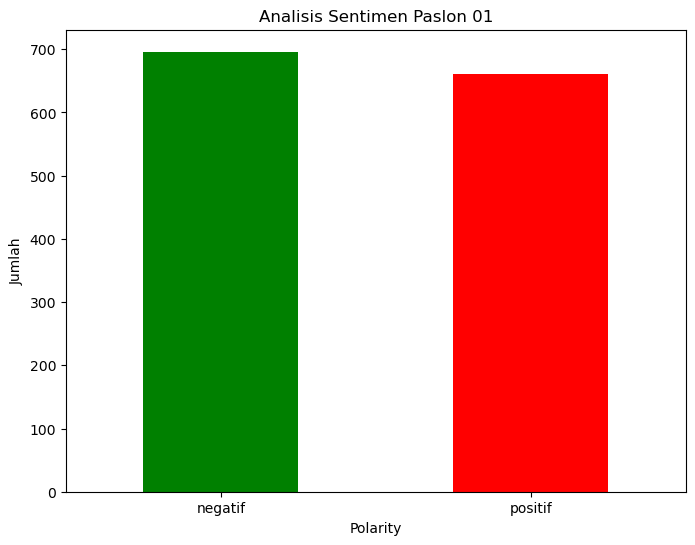

In [66]:
polarity_counts = df['polarity'].value_counts()

# Visualisasi diagram batang
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Analisis Sentimen Paslon 01')
plt.xlabel('Polarity')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [67]:
# Lokasi file CSV
file_normalisasi = r"C:\SEM VI\MACHINE LEARNING\normalisasi.csv"

# Muat DataFrame dari file CSV
normalizad_word = pd.read_csv(file_normalisasi)

# Lakukan normalisasi seperti yang Anda lakukan sebelumnya
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# df['text'] harus sudah didefinisikan sebelumnya

df['text'] = df['text'].apply(normalized_term)

# Menampilkan hasil normalisasi
for text in df['text'].head(20):
    print(text)

['pemerintah', 'hapus', 'kelas', 'dulunya', 'kelas', 'disamakan', 'standart', 'pengguna', 'bpjs', 'kelas', 'keberatan', 'digabung', 'kelas', 'kelas', 'iuran', 'naikan', 'kelas', 'standart', 'tercover']
['rancangan', 'asuransi', 'meringankan', 'perkembangannya', 'memberatkan', 'masyarakat', 'sistem', 'berubah', 'ubah', 'pelayanan', 'bertambah', 'susah']
['bikin', 'perpanjang', 'berlaku', 'menyertakan', 'bpjs', 'kesehatan', 'aktif', 'polri']
['konsep', 'gotong', 'royong', 'berkeadilan', 'dijadikan', 'kebutuhan', 'politis', 'kebijakan', 'putusan', 'politis']
['password', 'social', 'media']
['ngalahin', 'nabila', 'mengganggu', 'konsentrasi', 'supir', 'jalan', 'kritis', 'bahaya', 'menunaikan', 'hasrat', 'jalan', 'guru', 'siswa', 'menutupi', 'budget', 'anggaran']
['kerja', 'sinergi', 'kuat', 'diharapkan', 'orang', 'status', 'sosial', 'ekonomi', 'akses', 'pelayanan', 'kesehatan', 'berkualitas']
['bpjs', 'kesehatan', 'memberlakukan', 'sistem', 'kelas', 'rawat', 'inap', 'standar', 'kris', 'ruma

C:\Users\DIKY\AppData\Local\Temp\ipykernel_2740\1258145021.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\DIKY\AppData\Local\Temp\ipykernel_2740\1258145021.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


In [68]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df['stemming_ulasan'] = df['text'].apply(stemming)
df[['stemming_ulasan']]
for text in df['stemming_ulasan'].head(20):
    print(text)

perintah hapus kelas dulunya kelas sama standart guna bpjs kelas berat gabung kelas kelas iur naik kelas standart tercover
rancang asuransi ringan kembang berat masyarakat sistem ubah ubah layan tambah susah
bikin panjang laku serta bpjs sehat aktif polri
konsep gotong royong adil jadi butuh politis bijak putus politis
password social media
ngalahin nabila ganggu konsentrasi supir jalan kritis bahaya tunai hasrat jalan guru siswa tutup budget anggar
kerja sinergi kuat harap orang status sosial ekonomi akses layan sehat kualitas
bpjs sehat laku sistem kelas rawat inap standar kris rumah sakit jalin kerja lambat juni presiden jokowi resmi hapus kelas bpjs
enhance productivity with payroll services streamline operations focus growth simplify processes maximum output contact indonesia
presiden joko widodo ubah sistem kelas layan badan selenggara jamin sosial bpjs sehat kelas rawat inap standar kris tarif iur
bpjs sehat respons video ikang fawzi bpjs antre
perintah terap sistem kris kelas r

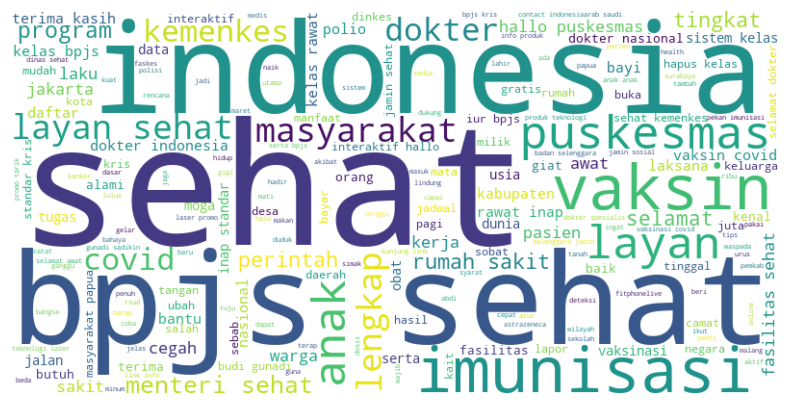

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the stemmed text in the 'stemming_ulasan' column
text_combined = ' '.join(df['stemming_ulasan'].values)
generate_wordcloud(text_combined)


In [70]:
from collections import Counter

# Tokenize the text to get individual words
words = text_combined.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  # Change 10 to however many top words you want to display

# Display the most common words
print("Top 10 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq} ")


Top 10 most common words:
sehat: 562 
bpjs: 221 
indonesia: 177 
layan: 174 
dokter: 156 
vaksin: 130 
puskesmas: 123 
kelas: 105 
imunisasi: 105 
anak: 101 


In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("C:\SEM VI\MACHINE LEARNING\stopwordbahasa.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
df['text'] = df['text'].apply(stopword_removal)
df.head(20)
# Menampilkan hasil normalisasi
for text in df['text'].head(20):
    print(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIKY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['pemerintah', 'hapus', 'kelas', 'dulunya', 'kelas', 'disamakan', 'standart', 'pengguna', 'bpjs', 'kelas', 'keberatan', 'digabung', 'kelas', 'kelas', 'iuran', 'naikan', 'kelas', 'standart', 'tercover']
['rancangan', 'asuransi', 'meringankan', 'perkembangannya', 'memberatkan', 'masyarakat', 'sistem', 'berubah', 'ubah', 'pelayanan', 'bertambah', 'susah']
['bikin', 'perpanjang', 'berlaku', 'menyertakan', 'bpjs', 'kesehatan', 'aktif', 'polri']
['konsep', 'gotong', 'royong', 'berkeadilan', 'dijadikan', 'kebutuhan', 'politis', 'kebijakan', 'putusan', 'politis']
['password', 'social', 'media']
['ngalahin', 'nabila', 'mengganggu', 'konsentrasi', 'supir', 'jalan', 'kritis', 'bahaya', 'menunaikan', 'hasrat', 'jalan', 'guru', 'siswa', 'menutupi', 'budget', 'anggaran']
['kerja', 'sinergi', 'kuat', 'diharapkan', 'orang', 'status', 'sosial', 'ekonomi', 'akses', 'pelayanan', 'kesehatan', 'berkualitas']
['bpjs', 'kesehatan', 'memberlakukan', 'sistem', 'kelas', 'rawat', 'inap', 'standar', 'kris', 'ruma

In [72]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df['stemming_ulasan'] = df['text'].apply(stemming)
df[['stemming_ulasan']]
for text in df['stemming_ulasan'].head(20):
    print(text)

perintah hapus kelas dulunya kelas sama standart guna bpjs kelas berat gabung kelas kelas iur naik kelas standart tercover
rancang asuransi ringan kembang berat masyarakat sistem ubah ubah layan tambah susah
bikin panjang laku serta bpjs sehat aktif polri
konsep gotong royong adil jadi butuh politis bijak putus politis
password social media
ngalahin nabila ganggu konsentrasi supir jalan kritis bahaya tunai hasrat jalan guru siswa tutup budget anggar
kerja sinergi kuat harap orang status sosial ekonomi akses layan sehat kualitas
bpjs sehat laku sistem kelas rawat inap standar kris rumah sakit jalin kerja lambat juni presiden jokowi resmi hapus kelas bpjs
enhance productivity with payroll services streamline operations focus growth simplify processes maximum output contact indonesia
presiden joko widodo ubah sistem kelas layan badan selenggara jamin sosial bpjs sehat kelas rawat inap standar kris tarif iur
bpjs sehat respons video ikang fawzi bpjs antre
perintah terap sistem kris kelas r

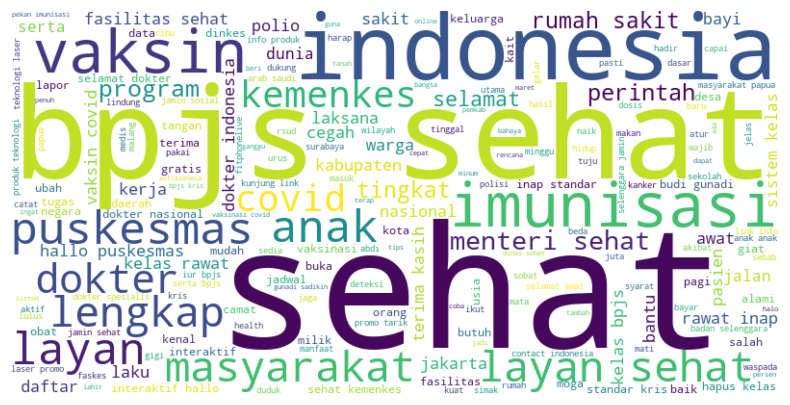

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the stemmed text in the 'stemming_ulasan' column
text_combined = ' '.join(df['stemming_ulasan'].values)
generate_wordcloud(text_combined)


In [75]:
from collections import Counter

# Tokenize the text to get individual words
words = text_combined.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  # Change 10 to however many top words you want to display

# Display the most common words
print("Top 10 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq} ")


Top 10 most common words:
sehat: 562 
bpjs: 221 
indonesia: 177 
layan: 174 
dokter: 156 
vaksin: 130 
puskesmas: 123 
kelas: 105 
imunisasi: 105 
anak: 101 


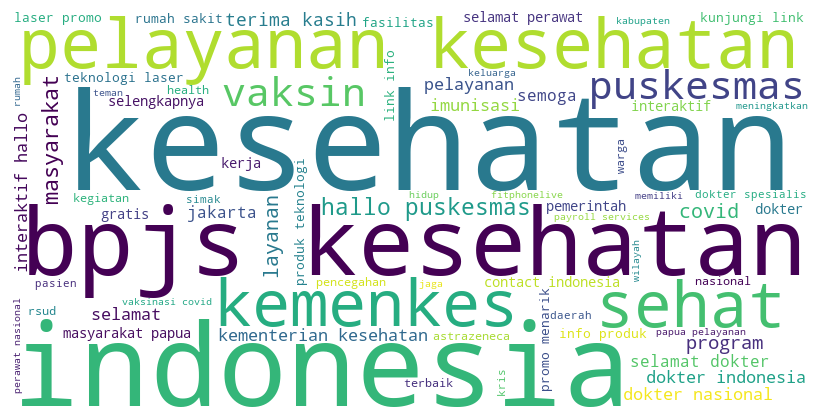

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mengumpulkan semua kata dari kolom teks yang memiliki sentimen positif
positive_text = ' '.join([' '.join(tokens) for tokens in df[df['polarity'] == 'positif']['text']])

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(positive_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


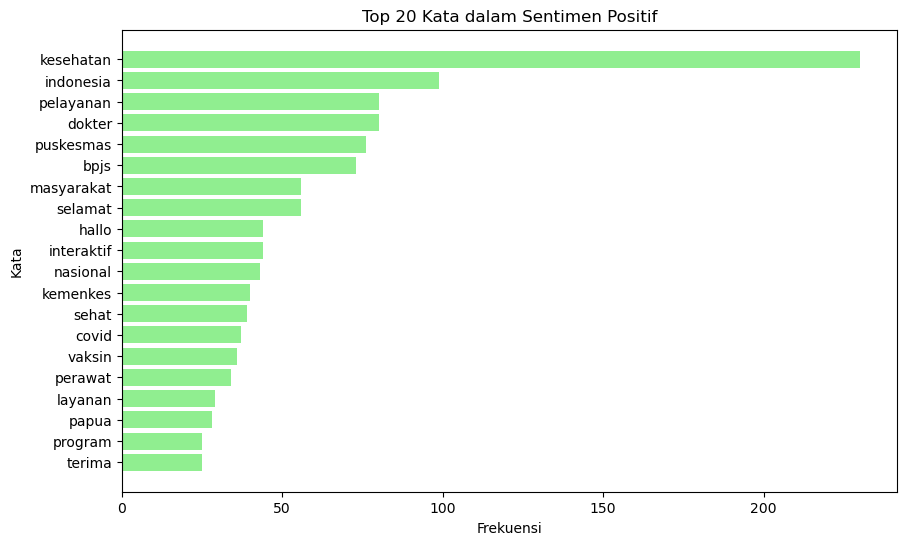

In [89]:
from collections import Counter

# Mengumpulkan semua kata dari kolom teks yang memiliki sentimen positif
positive_text = ' '.join([' '.join(tokens) for tokens in df[df['polarity'] == 'positif']['text']])

# Tokenisasi kata-kata dalam teks positif
tokens = positive_text.split()

# Hitung frekuensi kemunculan setiap kata
word_freq = Counter(tokens)

# Ambil 20 kata dengan frekuensi tertinggi
top_words = word_freq.most_common(20)

# Pisahkan kata-kata dan frekuensinya
words, freqs = zip(*top_words)

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='lightgreen')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata dalam Sentimen Positif')
plt.gca().invert_yaxis()  # agar kata dengan frekuensi tertinggi berada di bagian atas
plt.show()


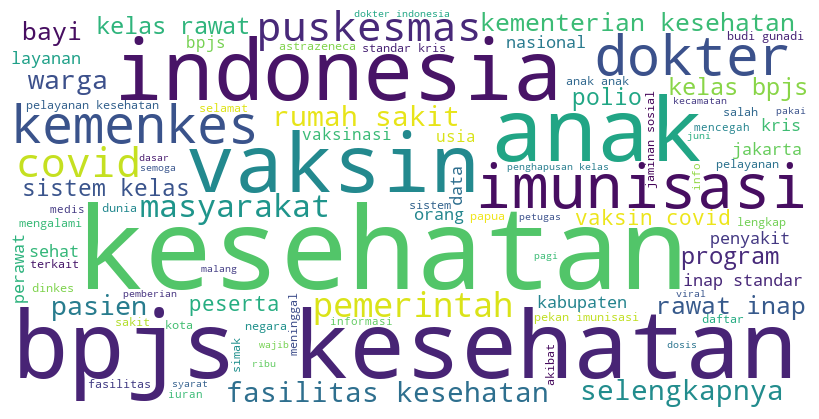

In [90]:
#@ NEGATIF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mengumpulkan semua kata dari kolom teks yang memiliki sentimen negatif
negative_text = ' '.join([' '.join(tokens) for tokens in df[df['polarity'] == 'negatif']['text']])

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(negative_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


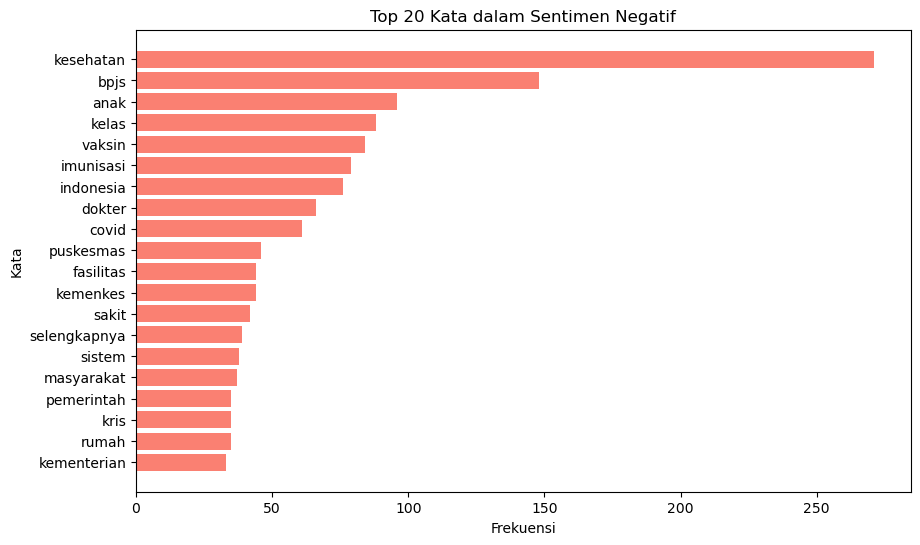

In [88]:
from collections import Counter

# Mengumpulkan semua kata dari kolom teks yang memiliki sentimen negatif
negative_text = ' '.join([' '.join(tokens) for tokens in df[df['polarity'] == 'negatif']['text']])

# Tokenisasi kata-kata dalam teks negatif
tokens = negative_text.split()

# Hitung frekuensi kemunculan setiap kata
word_freq = Counter(tokens)

# Ambil 20 kata dengan frekuensi tertinggi
top_words = word_freq.most_common(20)

# Pisahkan kata-kata dan frekuensinya
words, freqs = zip(*top_words)

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='salmon')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata dalam Sentimen Negatif')
plt.gca().invert_yaxis()  # agar kata dengan frekuensi tertinggi berada di bagian atas
plt.show()


In [63]:
df.to_csv(r"C:\Users\DIKY\tweets-data\DATA BERSIH.csv")